In [2]:
import tensorflow as tf

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")

# 打印显卡信息，确认GPU可用
print(gpus)


[]


In [3]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import os,PIL

# 设置随机种子尽可能使结果可以重现
import numpy as np
np.random.seed(1)

# 设置随机种子尽可能使结果可以重现
import tensorflow as tf
tf.random.set_seed(1)

import pathlib

data_dir = "F:\Study\Python\Deep-Learning-Practice\Tensorflow-Deep-Learning\CNN-recognize-pokemon\pokemon"

data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*')))

print("图片总数为：",image_count)

图片总数为： 219


In [5]:
batch_size = 8
img_height = 224
img_width = 224

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 219 files belonging to 10 classes.
Using 176 files for training.
Found 219 files belonging to 10 classes.
Using 43 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Alcremie', 'Eevee', 'Furfrou', 'Kyurem', 'Minior', 'Pikachu', 'Rotom', 'Squirtle', 'Vivillon', 'Zygarde']


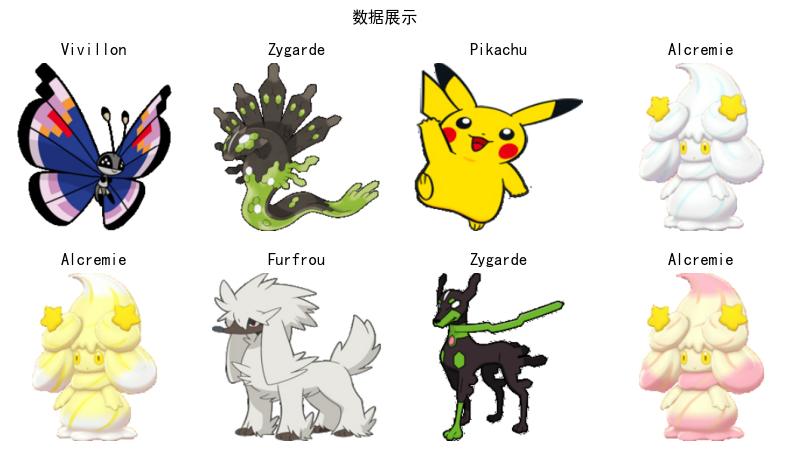

In [9]:
plt.figure(figsize=(10, 5))  # 图形的宽为10高为5
plt.suptitle("数据展示")

for images, labels in train_ds.take(1):
    for i in range(8):
        
        ax = plt.subplot(2, 4, i + 1)  
        
        ax.patch.set_facecolor('yellow')
        
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        
        plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 224, 224, 3)
(8,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
model = tf.keras.applications.DenseNet121(weights='imagenet')
model.summary()

33188688/33188688 [==============================] - 5s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [13]:
# 设置初始学习率
initial_learning_rate = 1e-4

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, 
        decay_steps=5,      
        decay_rate=0.96,     # lr经过一次衰减就会变成 decay_rate*lr
        staircase=True)

# 将指数衰减学习率送入优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [14]:
model.compile(optimizer=optimizer,
              loss     ='sparse_categorical_crossentropy',
              metrics  =['accuracy'])

In [15]:
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
22/22 [==============================] - 64s 2s/step - loss: 3.9629 - accuracy: 0.4375 - val_loss: 3.4876 - val_accuracy: 0.3721
Epoch 2/20
22/22 [==============================] - 41s 2s/step - loss: 0.1892 - accuracy: 0.9886 - val_loss: 2.1087 - val_accuracy: 0.6047
Epoch 3/20
22/22 [==============================] - 41s 2s/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 1.3057 - val_accuracy: 0.7674
Epoch 4/20
22/22 [==============================] - 41s 2s/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.9127 - val_accuracy: 0.8837
Epoch 5/20
22/22 [==============================] - 41s 2s/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 0.9070
Epoch 6/20
22/22 [==============================] - 41s 2s/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.5554 - val_accuracy: 0.9302
Epoch 7/20
22/22 [==============================] - 41s 2s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.4768 - val_accuracy: 0.9535
Epoch 8/20
22/22 [==

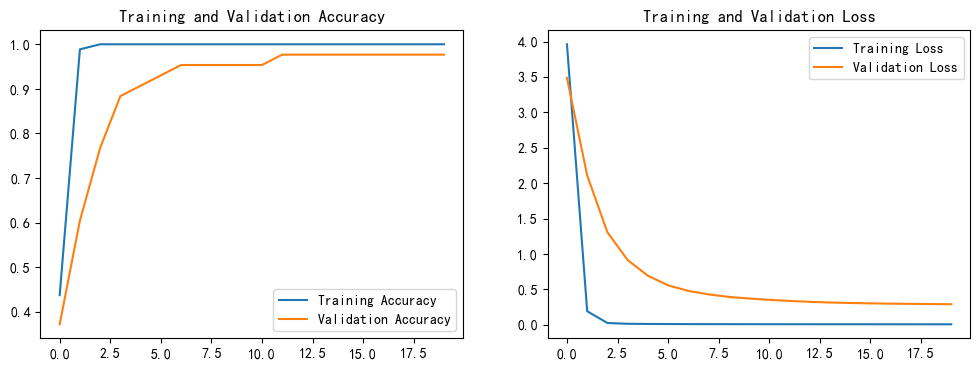

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# 保存模型
model.save('model/16_model.h5')

# 加载模型
new_model = tf.keras.models.load_model('model/16_model.h5')

1/1 [==============================] - 0s 85ms/step


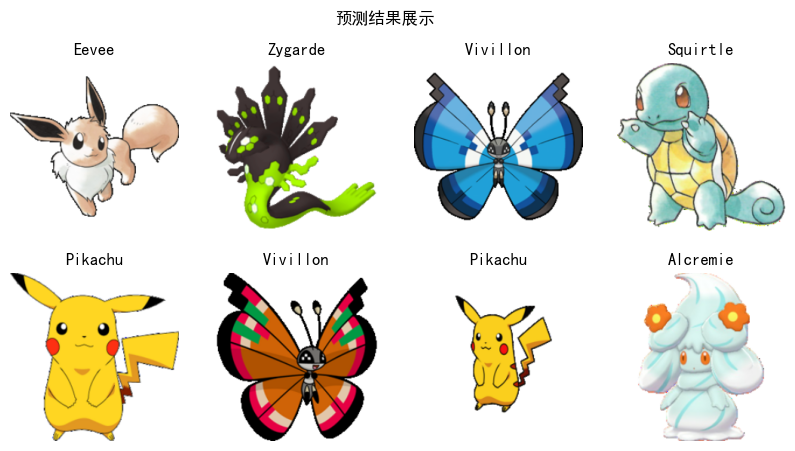

In [18]:
# 采用加载的模型（new_model）来看预测结果

plt.figure(figsize=(10, 5))  # 图形的宽为10高为5
plt.suptitle("预测结果展示")

for images, labels in val_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)  
        
        # 显示图片
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(images[i], 0) 
        
        # 使用模型预测图片中的人物
        predictions = new_model.predict(img_array)
        plt.title(class_names[np.argmax(predictions)])

        plt.axis("off")